<a href="https://colab.research.google.com/github/Jhonnyjakucr01/ant-design/blob/master/machinelearningTesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# 📂 Cargar los datos
df = pd.read_excel("homicidios cali.xlsx")

# 🛠️ Asegurar que los nombres de las columnas no tengan espacios extra
df.columns = df.columns.str.strip()

# 📊 Ver los primeros datos para confirmar que todo está bien
print(df.head(22))

    comuna  homicidios 2017  homicidios 2018  homicidios 2019  \
0        1               15                9               24   
1        2               32               25               27   
2        3               37               46               30   
3        4               28               22               19   
4        5               12               11               18   
5        6               63               83               67   
6        7               44               38               33   
7        8               38               51               46   
8        9               53               44               43   
9       10               36               46               35   
10      11               49               39               39   
11      12               33               40               34   
12      13              138              104               99   
13      14              117              111              111   
14      15              1

In [21]:
# 📌 Definir los años de entrenamiento y el año a predecir
X_años = np.array([2017,2018, 2019, 2020, 2022, 2023]).reshape(-1, 1)  # Años de entrenamiento
df["homicidios 2024 predicho"] = 0  # Columna para almacenar la predicción

# 🔥 PROBAR DOS MODELOS: Regresión Polinómica y Random Forest
poly = PolynomialFeatures(degree=3)  # Ajusta el grado si es necesario
X_poly = poly.fit_transform(X_años)

for i in range(len(df)):
    # 📌 Datos de homicidios por comuna
    y = np.array([
        df.loc[i, "homicidios 2017"],
        df.loc[i, "homicidios 2018"],
        df.loc[i, "homicidios 2019"],
        df.loc[i, "homicidios 2020"],
        df.loc[i, "homicidios 2022"],
        df.loc[i, "homicidios 2023"]
    ])

    # 📈 REGRESIÓN POLINÓMICA
    model_poly = LinearRegression()
    model_poly.fit(X_poly, y)

    # 📉 RANDOM FOREST REGRESSOR
    model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
    X_train = X_años.flatten().reshape(-1, 1)  # Formato correcto
    model_rf.fit(X_train, y)

    # 📊 Predecir para el año 2024 con ambos modelos
    X_pred = np.array([2017,2018, 2019, 2020, 2022, 2023, 2024]).reshape(-1, 1)
    X_pred_poly = poly.transform(X_pred)

    pred_2024_poly = model_poly.predict(X_pred_poly)[-1]  # Regresión Polinómica
    pred_2024_rf = model_rf.predict(np.array([[2024]]))[0]  # Random Forest

    # 🚀 Usamos el promedio de ambos modelos para mejorar la predicción
    pred_final = round((pred_2024_poly + pred_2024_rf) / 2)
    df.loc[i, "homicidios 2024 predicho"] = pred_final



    comuna  homicidios 2017  homicidios 2018  homicidios 2019  \
0        1               15                9               24   
1        2               32               25               27   
2        3               37               46               30   
3        4               28               22               19   
4        5               12               11               18   
5        6               63               83               67   
6        7               44               38               33   
7        8               38               51               46   
8        9               53               44               43   
9       10               36               46               35   
10      11               49               39               39   
11      12               33               40               34   
12      13              138              104               99   
13      14              117              111              111   
14      15              1

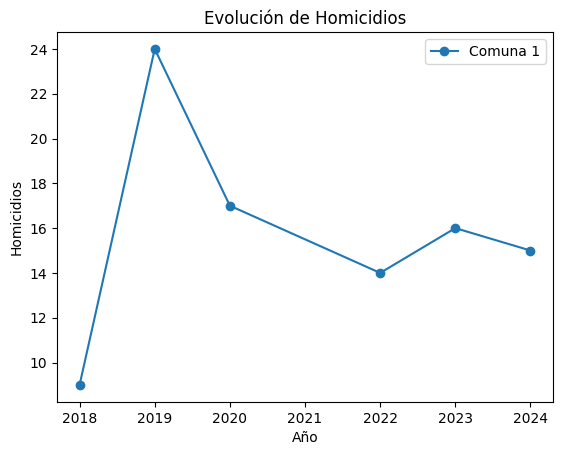

In [22]:
# ✅ Mostrar los resultados
print(df[["comuna","homicidios 2017", "homicidios 2018", "homicidios 2019","homicidios 2020", "homicidios 2022", "homicidios 2023", "homicidios 2024 predicho"]])

# 📉 Graficar una comuna específica para ver su evolución
comuna_ejemplo = 0  # Cambiar por el índice de la comuna a analizar
X_pred = np.array([2018, 2019, 2020, 2022, 2023, 2024]).reshape(-1, 1)
y_pred = df.loc[comuna_ejemplo, ["homicidios 2018", "homicidios 2019", "homicidios 2020","homicidios 2022", "homicidios 2023", "homicidios 2024 predicho"]].values

plt.plot(X_pred, y_pred, marker='o', linestyle='-', label=f'Comuna {df.loc[comuna_ejemplo, "comuna"]}')
plt.xlabel("Año")
plt.ylabel("Homicidios")
plt.title("Evolución de Homicidios")
plt.legend()
plt.show()
